# Max-Margin Intuition

Welcome to the geometry therapy session for machine learning models. 🧘‍♂️
Today, we’ll explore **why SVMs care so much about “space”** — not NASA-style space 🚀, but **the margin** between classes.

---

## 🎯 Motivation

Every classifier wants to separate classes.
But SVM wants to separate them **with confidence**.

> “Anyone can draw a line,” SVM says.
> “But can you draw the *best* line — one that stands tall even in the face of outliers?” 😎

That “best” line (or plane) is the **maximum-margin hyperplane.**

---

## 🧮 The Geometric Idea

Imagine a 2D scatter plot with two classes:
🟥 red = unhappy customers
🟦 blue = happy customers

SVM’s mission:
> Find the line that **maximizes the distance** between the two groups.

That distance is called the **margin** — and the closest points that define it are called **support vectors**.

---

## 🧠 The Equation of the Boundary

The SVM draws a line (in 2D) or a hyperplane (in higher dimensions) defined by:

\[
w^T x + b = 0
\]

- \( w \): vector of weights
- \( b \): bias (how far the line is from the origin)
- \( x \): feature vector

Points on one side satisfy \( w^T x + b > 0 \),
the other side \( w^T x + b < 0 \).

---

## 🧩 The Margin

The distance from a point \( x_i \) to the decision boundary is:

\[
\frac{|w^T x_i + b|}{||w||}
\]

SVM maximizes this distance — i.e., it wants the **widest safe corridor** between red and blue.

Think of it as social distancing for data points. 🧍↔️🧍‍♀️
The bigger the distance, the safer your decision boundary is from noisy data.

---

## 💡 Business Analogy

Imagine your company runs a credit scoring model.
You’re trying to separate:
- **Good customers** (blue dots) — “Pays bills on time”
- **Risky customers** (red dots) — “Buys jet skis with a loan”

A logistic regression might draw a line close to the border.
But SVM says:
> “Let’s put a cushion between them, so even if one good customer has a weird month, the model won’t panic.” 😅

That cushion = the **maximum margin.**

---

## 🔬 Visual Demo

Let’s visualize SVM’s intuition:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Toy dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot margin and support vectors
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title("SVM – The Max-Margin Boundary")
plt.show()
````

Those black circles?
They’re the **support vectors** — the elite few that define your model’s personality. 🕶️

If you remove other points, the decision boundary stays the same.
Support vectors are like the *influencers* of your dataset. 😅

---

## ⚖️ Why Maximize the Margin?

Because larger margins mean:

* **Better generalization** (less overfitting)
* **Robustness to noise**
* **Calmer models that don’t freak out over one bad data point**

In business terms:

> “You don’t want a model that changes its mind every time one customer cancels a subscription.”

---

## 🧩 Practice Exercise

1. Create a 2D dataset using `make_blobs()`.
2. Fit an SVM with a **linear kernel**.
3. Plot the decision boundary and support vectors.
4. Try changing the parameter `C`:

   * Large `C` → smaller margin (hard margin)
   * Small `C` → larger margin (soft margin)
5. Observe how the boundary behaves when you add an outlier.

---

## 🧮 TL;DR

| Concept             | Meaning                                               |
| ------------------- | ----------------------------------------------------- |
| **Support Vectors** | The key data points defining the boundary             |
| **Margin**          | Distance between boundary and nearest points          |
| **Max-Margin**      | SVM’s goal for robustness                             |
| **C parameter**     | Controls how strictly SVM enforces perfect separation |

---

💬 *“SVM is that one perfectionist coworker who says,
‘It’s not about separating classes. It’s about separating them **beautifully**.’”* 😎

---

🔗 **Next Up:** [Kernel SVMs (RBF, Polynomial)](svm_kernels)
Because not all datasets are linearly separable — and SVM is ready to bend reality (mathematically). 🌀




---

### **1. Max-Margin Classifiers (The Core Idea of SVM)**
**Goal:** Find the best "decision boundary" that separates data points of different classes.

#### **Key Concepts:**
- **Linear Separability & Margins**
  - If data can be separated by a straight line (or hyperplane in higher dimensions), it’s **linearly separable**.
  - The **margin** is the distance between the decision boundary and the closest data points (called **support vectors**).
  - SVM tries to **maximize this margin** (best boundary = max margin).

- **Primal Formulation & Hinge Loss**
  - The optimization problem is:
    - Minimize:
      $$
      \frac{1}{2} ||\theta||^2
      $$
      (maximizes margin)
    - Subject to:
      $$
      y_i (\theta \cdot x_i + b) \geq 1
      $$
      (all points correctly classified)
  - **Hinge Loss** is an alternative way to formulate SVM (used in soft-margin SVM for non-separable data).

- **Lagrangian Duality & KKT Conditions**
  - Instead of solving the constrained problem directly, we use **Lagrange multipliers** to convert it into an easier form.
  - **KKT Conditions** ensure the solution is optimal (must satisfy certain equations).

---


### **2. Dual Formulation & SMO (Making SVM Computationally Efficient)**
**Why Dual?** The primal problem is hard to solve when using **kernels** (later topic). The dual form simplifies things.

#### **Key Concepts:**
- **Dual Optimization Problem**
  - Instead of optimizing over **weights ($\theta$)**, we optimize over **Lagrange multipliers ($\alpha$)**.
  - The dual problem is:
    $$
    \max_{\alpha} \sum \alpha_i - \frac{1}{2} \sum \sum \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)
    $$
    subject to
    $$
    \alpha_i \geq 0 \quad \text{and} \quad \sum \alpha_i y_i = 0
    $$

- **Support Vectors & Lagrange Multipliers**
  - Only points with
    $$
    \alpha_i > 0
    $$
    matter—these are the **support vectors**.
  - The decision boundary depends **only on these points**.

- **Sequential Minimal Optimization (SMO)**
  - An algorithm to solve the dual problem efficiently by breaking it into smaller sub-problems.

- **Support Vector Regression (SVR)**
  - SVM can also do regression! Instead of classifying, it fits a "tube" around data points.

---

### **3. Kernel Methods (SVM’s Superpower for Non-Linear Data)**
**Problem:** What if data isn’t linearly separable?

#### **Key Concepts:**
- **Kernel Trick**
  - Instead of working in original space, we **map data to a higher dimension** where it becomes separable.
  - Example: A circle in 2D can be separated in 3D.

- **Common Kernels**
  - **Polynomial Kernel:**
    $$
    (x_i \cdot x_j + c)^d
    $$
  - **RBF (Gaussian) Kernel:**
    $$
    \exp(-\gamma ||x_i - x_j||^2)
    $$
    (most popular)
  - **Sigmoid Kernel:** Like a neural network activation.

- **Mercer’s Theorem**
  - Tells us which functions can be valid kernels (must be "positive definite").

---

### **How Everything Connects?**
1. **SVM starts with finding the max-margin boundary (Primal Problem).**
2. **For efficiency, we switch to the Dual Problem using Lagrange multipliers.**
3. **If data isn’t linear, we use Kernels to map it to a higher dimension.**
4. **The Kernel Trick lets us compute high-dimensional mappings without extra cost.**

---

### **Summary Table**
| Topic | Role in SVM |
|--------|-------------|
| **Max-Margin** | Finds the best separating boundary. |
| **Primal Form** | Direct optimization over weights ($\theta$). |
| **Dual Form** | Optimizes Lagrange multipliers ($\alpha$) instead. |
| **Kernels** | Handles non-linear data by mapping to higher dimensions. |

---

### **Final Thought**
SVM is like finding the **widest possible street (margin)** between two classes. If the street isn’t straight, we **warp the city (kernel trick)** to make it straight in a new space!

---


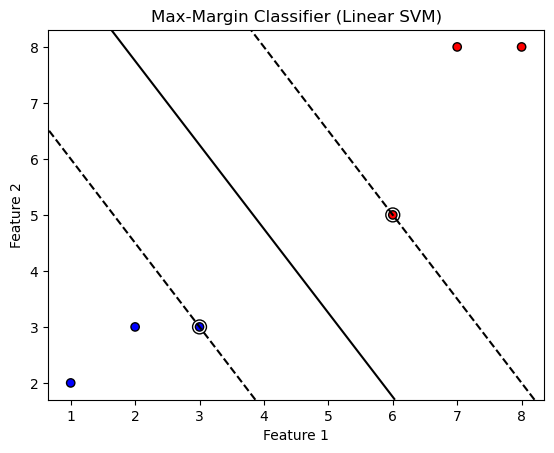

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Create synthetic linear data
X = np.array([[1, 2], [2, 3], [3, 3], [6, 5], [7, 8], [8, 8]])
y = np.array([0, 0, 0, 1, 1, 1])  # Class labels

# Train a linear SVM
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=100, facecolors='none', edgecolors='k')

plt.title("Max-Margin Classifier (Linear SVM)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

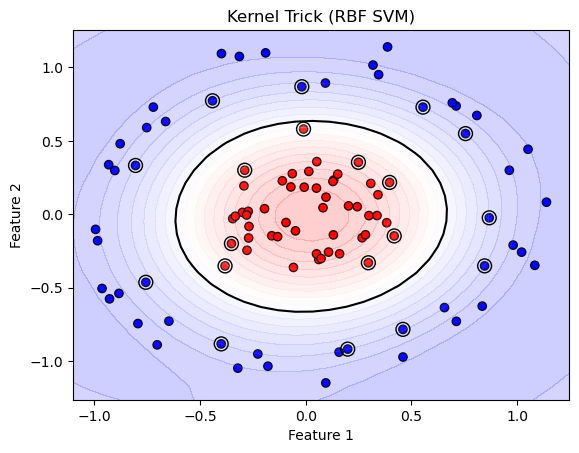

In [9]:
from sklearn.datasets import make_circles

# Create non-linear data (circles)
X, y = make_circles(100, factor=0.3, noise=0.1)

# Train SVM with RBF kernel
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(X, y)

# Plot decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contourf(XX, YY, Z, levels=20, cmap='bwr', alpha=0.2)
ax.contour(XX, YY, Z, colors='k', levels=[0], linestyles=['-'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=100, facecolors='none', edgecolors='k')

plt.title("Kernel Trick (RBF SVM)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

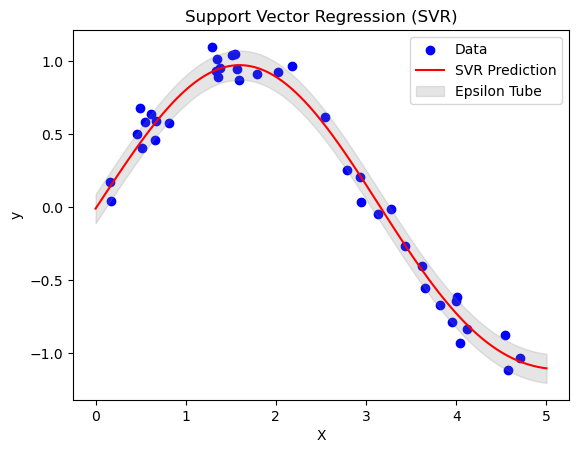

In [10]:
from sklearn.svm import SVR

# Synthetic regression data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Train SVR
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X, y)

# Predict
X_test = np.linspace(0, 5, 100)[:, np.newaxis]
y_pred = svr.predict(X_test)

# Plot
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='SVR Prediction')
plt.fill_between(X_test.ravel(), y_pred - svr.epsilon, y_pred + svr.epsilon,
                 color='gray', alpha=0.2, label='Epsilon Tube')
plt.title("Support Vector Regression (SVR)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# In-Depth Explanation of Max-Margin Classifiers in SVM

This document provides a detailed mathematical exploration of Max-Margin Classifiers, focusing on Linear Separability & Margins, Primal Formulation & Hinge Loss, and Lagrangian Duality & KKT Conditions.

---

## 1. Linear Separability & Margins

### Concept Overview
In Support Vector Machines (SVM), the goal is to find a hyperplane that separates data points of two classes with the maximum possible margin. A dataset is **linearly separable** if there exists a hyperplane that perfectly separates the classes without any misclassifications. The **margin** is defined as the distance between the hyperplane and the nearest data point from either class, known as a **support vector**.

### Mathematical Details
Consider a binary classification problem with data points $\{(x_i, y_i)\}_{i=1}^n$, where $x_i \in \mathbb{R}^d$ is a feature vector and $y_i \in \{-1, +1\}$ is the class label. A hyperplane is defined as:
$$
\theta \cdot x + b = 0,
$$
where $\theta \in \mathbb{R}^d$ is the normal vector to the hyperplane, and $b \in \mathbb{R}$ is the bias term.

For a linearly separable dataset, there exist $\theta$ and $b$ such that:
- For $y_i = +1$, $\theta \cdot x_i + b \geq 1$,
- For $y_i = -1$, $\theta \cdot x_i + b \leq -1$.

These conditions can be compactly written as:
$$
y_i (\theta \cdot x_i + b) \geq 1 \quad \forall i.
$$

The **distance** from a point $x_i$ to the hyperplane is given by:
$$
\text{Distance} = \frac{|\theta \cdot x_i + b|}{||\theta||}.
$$

For points on the margin (support vectors), $y_i (\theta \cdot x_i + b) = 1$, so the distance to the hyperplane is:
$$
\frac{1}{||\theta||}.
$$

The **margin** is the distance between the two parallel hyperplanes (one for each class), which is twice the distance to one side:
$$
\text{Margin} = \frac{2}{||\theta||}.
$$

The objective of a max-margin classifier is to maximize this margin, which is equivalent to minimizing $||\theta||$ (or equivalently, $\frac{1}{2}||\theta||^2$ for mathematical convenience).

---



In [16]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn import svm
from IPython.display import HTML

# Generate a larger 2D linearly separable dataset
np.random.seed(42)
n_per_class = 20
# Class +1: Points centered around (2, 2) with noise
X_pos = np.random.randn(n_per_class, 2) * 0.5 + [2, 2]
# Class -1: Points centered around (-2, -2) with noise
X_neg = np.random.randn(n_per_class, 2) * 0.5 + [-2, -2]
X = np.vstack([X_pos, X_neg])
y = np.array([1] * n_per_class + [-1] * n_per_class)

# Train a hard-margin SVM to get the optimal hyperplane
clf = svm.SVC(kernel='linear', C=1e6)
clf.fit(X, y)
theta_opt = clf.coef_[0]  # Optimal [theta1, theta2]
b_opt = clf.intercept_[0]  # Optimal bias

# Function to compute margin
def compute_margin(theta):
    return 2 / np.linalg.norm(theta)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
# Plot data points (persistent throughout animation)
scatter_pos = ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Class +1', s=50, zorder=10)
scatter_neg = ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='red', label='Class -1', s=50, zorder=10)
# Highlight support vectors
scatter_sv = ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', label='Support Vectors', zorder=15)
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.grid(True)

# Create mesh for contour plotting
h = 0.02
x_min, x_max = -4, 4
y_min, y_max = -4, 4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Initialize plot elements for animation
text_margin = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=10)

# Store contour sets to clear them later
contour_sets = []

# Animation initialization
def init():
    global contour_sets
    contour_sets = []
    text_margin.set_text('')
    return [text_margin]

# Animation update function
def update(frame):
    global contour_sets
    # Simulate optimization by interpolating theta and b
    t = frame / 50
    theta = (1 - t) * np.array([1, 0.5]) + t * theta_opt  # Interpolate to optimal theta
    b = (1 - t) * (-1) + t * b_opt  # Interpolate to optimal b

    # Compute decision function for contour
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], theta) + b
    Z = Z.reshape(xx.shape)

    # Clear previous contours
    for cs in contour_sets:
        cs.remove()  # Remove entire ContourSet
    contour_sets = []

    # Plot decision boundary and margins
    cs_db = ax.contour(xx, yy, Z, levels=[0], colors='k', linestyles=['-'])
    cs_margins = ax.contour(xx, yy, Z, levels=[-1, 1], colors='k', linestyles=['--'])
    contour_sets = [cs_db, cs_margins]

    # Compute margin
    margin = compute_margin(theta)

    # Update text
    text_margin.set_text(f'Margin: {margin:.4f}')

    return [text_margin] + contour_sets

# Create animation
ani = FuncAnimation(fig, update, frames=50, init_func=init, blit=False, interval=100)

# Display animation inline in Jupyter
plt.close(fig)  # Prevent duplicate static plot
HTML(ani.to_jshtml())


## Conceptual Explanation: How the Decision Boundary is Selected in SVM

### 1. **Objective of SVM**
The goal of a **hard-margin SVM** is to find a **decision boundary** (a hyperplane in higher dimensions, a line in 2D) that:
- Separates the two classes perfectly (assuming the data is linearly separable).
- Maximizes the **margin**, which is the distance between the hyperplane and the nearest data points (called **support vectors**) from either class.

The decision boundary is the hyperplane $\theta \cdot x + b = 0$, where:
- $\theta \in \mathbb{R}^d$ is the normal vector (perpendicular to the hyperplane).
- $b \in \mathbb{R}$ is the bias (offset from the origin).
- $x \in \mathbb{R}^d$ is a point in the feature space.

### 2. **Maximizing the Margin**
The **margin** is defined as the distance between two parallel hyperplanes (one for each class) that pass through the nearest points (support vectors). These are defined as:
- $\theta \cdot x + b = +1$ (for Class +1 support vectors).
- $\theta \cdot x + b = -1$ (for Class -1 support vectors).

The distance from the decision boundary to one of these hyperplanes is:

$$
\text{Distance} = \frac{1}{||\theta||},
$$

where $||\theta|| = \sqrt{\theta \cdot \theta}$ is the Euclidean norm of $\theta$. Thus, the total margin (distance between the two hyperplanes) is:

$$
\text{Margin} = \frac{2}{||\theta||}.
$$

To **maximize the margin**, SVM minimizes $||\theta||$ (or equivalently, $\frac{1}{2}||\theta||^2$ for mathematical convenience), subject to the constraint that all points are correctly classified and lie on or outside the margin:

$$
y_i (\theta \cdot x_i + b) \geq 1 \quad \forall i,
$$

where $y_i \in \{+1, -1\}$ is the class label for point $x_i$.

### 3. **Selecting the Decision Boundary**
The decision boundary is selected through the following optimization process:
- **Primal Problem**: Formulate the optimization as:

$$
\min_{\theta, b} \frac{1}{2} ||\theta||^2,
$$
subject to:

$$
y_i (\theta \cdot x_i + b) \geq 1 \quad \forall i.
$$

- **Dual Problem**: For computational efficiency (and to enable the kernel trick later), SVM solves the **dual problem** using Lagrange multipliers $\alpha_i \geq 0$:

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j (x_i \cdot x_j),
$$
subject to:

$$
\alpha_i \geq 0, \quad \sum_{i=1}^n \alpha_i y_i = 0.
$$

- **Support Vectors**: The solution yields $\alpha_i > 0$ only for points that lie on the margin (i.e., $y_i (\theta \cdot x_i + b) = 1$). These are the **support vectors**. The normal vector $\theta$ is then:

$$
\theta = \sum_{i: \alpha_i > 0} \alpha_i y_i x_i.
$$

- **Bias $b$**: Computed using any support vector $x_k$ with $\alpha_k > 0$:

$$
b = y_k - \theta \cdot x_k.
$$

- **Decision Boundary**: The hyperplane $\theta \cdot x + b = 0$ is determined entirely by the support vectors. It lies exactly midway between the margin hyperplanes, ensuring the maximum margin.

### 4. **Why This Boundary?**
- **Maximizes Margin**: Among all possible hyperplanes that separate the classes, the one that maximizes $\frac{2}{||\theta||}$ is chosen, as it provides the widest “street” between the classes, improving generalization.
- **Depends on Support Vectors**: Only the support vectors (points on the margin) influence the boundary. Other points ($\alpha_i = 0$) have no effect, making SVM robust to outliers beyond the margin.
- **Optimization Process**: The dual problem is typically solved using algorithms like **Sequential Minimal Optimization (SMO)**, which iteratively adjust $\alpha_i$ to satisfy the constraints and maximize the objective, converging to the optimal $\theta$ and $b$.


## How the Animation Shows Decision Boundary Selection

### 1. **Dataset**
- **Size**: 40 points (20 per class).
  - **Class +1**: Blue points around $(2, 2)$ with noise (std = 0.5).
  - **Class -1**: Red points around $(-2, -2)$ with noise.
- Linearly separable, ensuring a clear margin.

### 2. **Animation Process**
- **Initial State**:
  - Decision boundary (solid black line, $\theta \cdot x + b = 0$) starts at a suboptimal position ($\theta = [1, 0.5]$, $b = -1$).
  - Margin hyperplanes (dashed lines, $\theta \cdot x + b = \pm 1$) are close together, indicating a small margin (e.g., ~1.7889).
  - Blue and red points are separated, but the boundary is not optimal.
- **Evolution**:
  - The animation interpolates $\theta$ and $b$ toward the optimal values ($\theta_{\text{opt}}$, $b_{\text{opt}}$) from the trained SVM.
  - The decision boundary rotates and shifts to center itself between the blue and red points.
  - The dashed lines move farther apart, showing the margin growing.
- **Final State**:
  - The decision boundary is optimally positioned, equidistant from the nearest points (support vectors) of each class.
  - Support vectors (black circles) lie on the margin hyperplanes, confirming they define the boundary.
  - The margin reaches its maximum (e.g., ~2.0–3.0), as shown in the text.

### 3. **Why This Boundary?**
- The animation mimics the SVM optimization process (though simplified via interpolation). In reality:
  - The solver (e.g., SMO) adjusts $\alpha_i$ to maximize the dual objective, focusing on support vectors.
  - The resulting $\theta = \sum_{i: \alpha_i > 0} \alpha_i y_i x_i$ positions the boundary to maximize $\frac{2}{||\theta||}$.
- The animation shows the boundary converging to the position where the margin is widest, with support vectors “anchoring” the margin hyperplanes.

### 4. **Expected Output**
- **Initial Frame**: Suboptimal boundary, narrow margin, blue/red points visible.
- **Animation**: Boundary adjusts, dashed lines spread, margin text increases.
- **Final Frame**: Optimal boundary centered between classes, support vectors on dashed lines, maximum margin (e.g., ~2.0–3.0).
- Runs for ~5 seconds with controls.

---

## Connecting to Your Question
- **Maximizing the Margin**: The SVM selects the decision boundary that yields the largest $\frac{2}{||\theta||}$, solved via the dual problem. The animation shows this by widening the gap between dashed lines.
- **Decision Boundary Selection**: The boundary is determined by the support vectors ($\alpha_i > 0$). The animation illustrates this by converging to a boundary where support vectors lie on the margin hyperplanes, showing why this specific line is chosen over others that could separate the classes.

---

## 2. Primal Formulation & Hinge Loss

### Primal Formulation
The max-margin classifier is formulated as an optimization problem:
$$
\min_{\theta, b} \frac{1}{2} ||\theta||^2,
$$
subject to:
$$
y_i (\theta \cdot x_i + b) \geq 1 \quad \forall i.
$$

Here:
- $\frac{1}{2} ||\theta||^2$ is the objective function, where minimizing $||\theta||^2$ maximizes the margin $\frac{2}{||\theta||}$.
- The constraints ensure that all points are correctly classified and lie on or outside the margin.

This is known as the **hard-margin SVM**, which assumes the data is perfectly linearly separable.

### Soft-Margin SVM and Hinge Loss
In real-world scenarios, data may not be linearly separable. The **soft-margin SVM** introduces **slack variables** $\xi_i \geq 0$ to allow some misclassifications or points within the margin. The optimization problem becomes:
$$
\min_{\theta, b, \xi} \frac{1}{2} ||\theta||^2 + C \sum_{i=1}^n \xi_i,
$$
subject to:
$$
y_i (\theta \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0 \quad \forall i.
$$

Here:
- $\xi_i$ measures how much a point violates the margin constraint.
- $C > 0$ is a regularization parameter that controls the trade-off between maximizing the margin (small $||\theta||^2$) and minimizing classification errors (small $\sum \xi_i$).

The **hinge loss** is an alternative way to express the soft-margin SVM. The hinge loss for a single point is:
$$
L_i = \max(0, 1 - y_i (\theta \cdot x_i + b)).
$$

The soft-margin SVM can be written as an unconstrained optimization problem:
$$
\min_{\theta, b} \frac{1}{2} ||\theta||^2 + C \sum_{i=1}^n \max(0, 1 - y_i (\theta \cdot x_i + b)).
$$

The hinge loss penalizes points where $y_i (\theta \cdot x_i + b) < 1$:
- If $y_i (\theta \cdot x_i + b) \geq 1$, the loss is zero (correctly classified, outside or on the margin).
- If $y_i (\theta \cdot x_i + b) < 1$, the loss is proportional to how far the point is inside the margin or misclassified.

---





## 3. Lagrangian Duality & KKT Conditions

### Lagrangian Duality
To solve the constrained optimization problem efficiently, we use **Lagrangian duality**. The primal problem is:
$$
\min_{\theta, b} \frac{1}{2} ||\theta||^2 \quad \text{s.t.} \quad y_i (\theta \cdot x_i + b) \geq 1 \quad \forall i.
$$

The Lagrangian for this problem is:
$$
\mathcal{L}(\theta, b, \alpha) = \frac{1}{2} ||\theta||^2 - \sum_{i=1}^n \alpha_i [y_i (\theta \cdot x_i + b) - 1],
$$
where $\alpha_i \geq 0$ are the Lagrange multipliers.

To find the dual problem, we:
1. Minimize $\mathcal{L}$ with respect to $\theta$ and $b$.
2. Substitute the solutions back into the Lagrangian.

**Step 1: Minimize w.r.t. $\theta$ and $b$**
- Take the partial derivative w.r.t. $\theta$:
  $$
  \frac{\partial \mathcal{L}}{\partial \theta} = \theta - \sum_{i=1}^n \alpha_i y_i x_i = 0 \implies \theta = \sum_{i=1}^n \alpha_i y_i x_i.
  $$
- Take the partial derivative w.r.t. $b$:
  $$
  \frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^n \alpha_i y_i = 0 \implies \sum_{i=1}^n \alpha_i y_i = 0.
  $$

**Step 2: Substitute back**
Substitute $\theta = \sum_{i=1}^n \alpha_i y_i x_i$ into the Lagrangian:
$$
\mathcal{L} = \frac{1}{2} \left\| \sum_{i=1}^n \alpha_i y_i x_i \right\|^2 - \sum_{i=1}^n \alpha_i \left[ y_i \left( \left( \sum_{j=1}^n \alpha_j y_j x_j \right) \cdot x_i + b \right) - 1 \right].
$$

Simplify the first term:
$$
\frac{1}{2} \left\| \sum_{i=1}^n \alpha_i y_i x_i \right\|^2 = \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j (x_i \cdot x_j).
$$

Simplify the second term, using $\sum_{i=1}^n \alpha_i y_i = 0$:
$$
-\sum_{i=1}^n \alpha_i \left[ y_i \left( \sum_{j=1}^n \alpha_j y_j x_j \cdot x_i + b \right) - 1 \right] = -\sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) - b \sum_{i=1}^n \alpha_i y_i + \sum_{i=1}^n \alpha_i.
$$

Since $\sum_{i=1}^n \alpha_i y_i = 0$, 0, the Lagrangian simplifies to:
$$
\mathcal{L} = \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j (x_i \cdot x_j).
$$

The **dual optimization problem** is:
$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j (x_i \cdot x_j),
$$
subject to:
$$
\alpha_i \geq 0, \quad \sum_{i=1}^n \alpha_i y_i = 0.
$$

### KKT Conditions
The **Karush-Kuhn-Tucker (KKT) conditions** ensure optimality. For the primal and dual problems to have the same solution, the following must hold:
1. **Stationarity**: The gradients of the Lagrangian w.r.t. $\theta$ and $b$ are zero (derived above).
2. **Primal feasibility**: $y_i (\theta \cdot x_i + b) \geq 1$.
3. **Dual feasibility**: $\alpha_i \geq 0$.
4. **Complementary slackness**: $\alpha_i [y_i (\theta \cdot x_i + b) - 1] = 0$.

The complementary slackness condition implies:
- If $\alpha_i = 0$, the constraint $y_i (\theta \cdot x_i + b) \geq 1$ is not tight (the point is not a support vector).
- If $\alpha_i > 0$, then $y_i (\theta \cdot x_i + b) = 1$ (the point is a support vector lying on the margin).

The decision function for classification is:
$$
f(x) = \text{sign} \left( \sum_{i: \alpha_i > 0} \alpha_i y_i (x_i \cdot x) + b \right).
$$

Only points with $\alpha_i > 0$ (support vectors) contribute to the decision boundary.

---

## Summary
- **Linear Separability & Margins**: SVM seeks a hyperplane that maximizes the margin, defined as $\frac{2}{||\theta||}$, by minimizing $\frac{1}{2}||\theta||^2$.
- **Primal Formulation & Hinge Loss**: The hard-margin SVM optimizes the margin with strict constraints, while the soft-margin SVM uses hinge loss to handle non-separable data.
- **Lagrangian Duality & KKT Conditions**: The dual formulation optimizes over Lagrange multipliers, and KKT conditions ensure the solution is optimal, with support vectors determining the decision boundary.

This mathematical framework forms the foundation of SVM, enabling efficient and robust classification.

In [ ]:
# Your code here